# **Importing modules**

In [2]:
# Import Tensorflow 2.0
import tensorflow as tf 
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models


In [3]:
#%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
Split the data and scale them by dividing 255
Also add an extra dimension for inputing into the Convolution layer  

In [4]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data() #Y : name of the number ; X : picture of that number in 28x28
X_train = X_train/255.0
X_test = X_test/255.0
X_train = tf.expand_dims(X_train, -1)
X_test = tf.expand_dims(X_test, -1)
print(tf.shape(X_train))

11493376/11490434 [==============================] - 0s 0us/step
tf.Tensor([60000    28    28     1], shape=(4,), dtype=int32)


# **Structure of the neural network**

In [6]:
model = models.Sequential()
model.add(layers.Conv2D(32, (4, 4), strides = 1, activation='relu', input_shape=(28, 28,1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                6

# **Train the model manually**

In [21]:
from tqdm import tqdm

batch_size = 12
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-2)
for epoch in range(1):
  print(f'\n{epoch+1}')

  for idx in tqdm(range(0, X_train.shape[0], batch_size)):
  # First grab a batch of training data and convert the input images to tensors
    (images, labels) = (X_train[idx:idx+batch_size], Y_train[idx:idx+batch_size])
  #images = tf.convert_to_tensor(images, dtype=tf.float32)

  # GradientTape to record differentiation operations
    with tf.GradientTape() as tape:
      logits = model(images)
      loss_value = tf.keras.backend.sparse_categorical_crossentropy(labels, logits, from_logits=True)

  # Backpropagation
    grads = tape.gradient(loss_value, model.trainable_variables)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

  0%|          | 19/5000 [00:00<00:26, 184.74it/s]


1


100%|██████████| 5000/5000 [00:24<00:00, 201.02it/s]


# **Train the model with 'fit'**

In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, Y_train, epochs=10, 
                    validation_data=(X_test, Y_test))

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1341 - accuracy: 0.9591 - val_loss: 0.0483 - val_accuracy: 0.9858
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0452 - accuracy: 0.9861 - val_loss: 0.0291 - val_accuracy: 0.9909
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0321 - accuracy: 0.9898 - val_loss: 0.0311 - val_accuracy: 0.9900
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0242 - accuracy: 0.9920 - val_loss: 0.0295 - val_accuracy: 0.9907
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0191 - accuracy: 0.9938 - val_loss: 0.0312 - val_accuracy: 0.9899
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0155 - accuracy: 0.9948 - val_loss: 0.0269 - val_accuracy: 0.9912
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0109 - accuracy: 0.9963 - val_loss: 0.0257 - val_accuracy:

# **Make a prediction using the testing data**

prediction:9


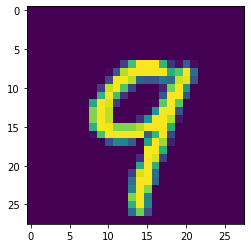

In [20]:
  import numpy as np
  data = tf.expand_dims(X_test[12], 0)
  prediction = model.predict(data)

  if np.argmax(prediction[0]) == Y_test[12]:
    no = str(Y_test[12])
    img = tf.squeeze(X_test[12], [2])
    imgplot = plt.imshow(img)
    print(f'prediction:{no}')
  else:
    print('cannot do')
    print(f'{np.argmax(prediction[0])}')
    img = tf.squeeze(X_test[12], [2])
    imgplot = plt.imshow(img)
  
